# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Importing dataset

In [2]:
iris=pd.read_csv("D:\\Career\\Unified_Mentor_Intenship\\iris.csv")
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration

In [3]:
iris.duplicated().sum()

3

In [5]:
iris.drop_duplicates(inplace=True)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [7]:
iris.describe(include="all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,147.000000,147.000000,147.000000,147.000000,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.856463,3.055782,3.780272,1.208844,NaN
std,0.829100,0.437009,1.759111,0.757874,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
iris.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

Therefore this indicates 4 continuous column and one (the target feature) categorical column.
This indicates a classification problem

# Exploratory Data Analysis

<Axes: xlabel='Species', ylabel='count'>

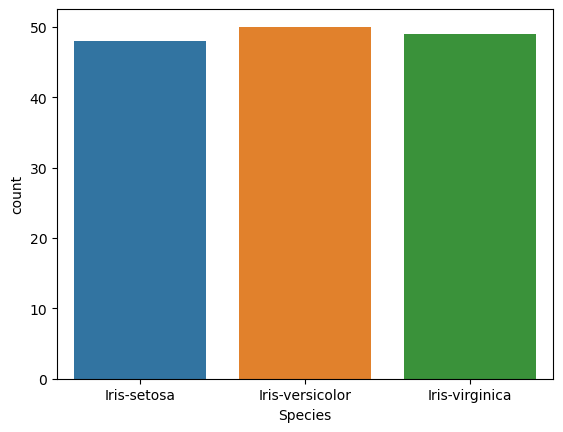

In [9]:
#Checking imbalance in target feature
sns.countplot(x='Species',data=iris)

This plot indicates there is a fine distribution between all variables in the target feature, there is no significant imbalance present in that

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

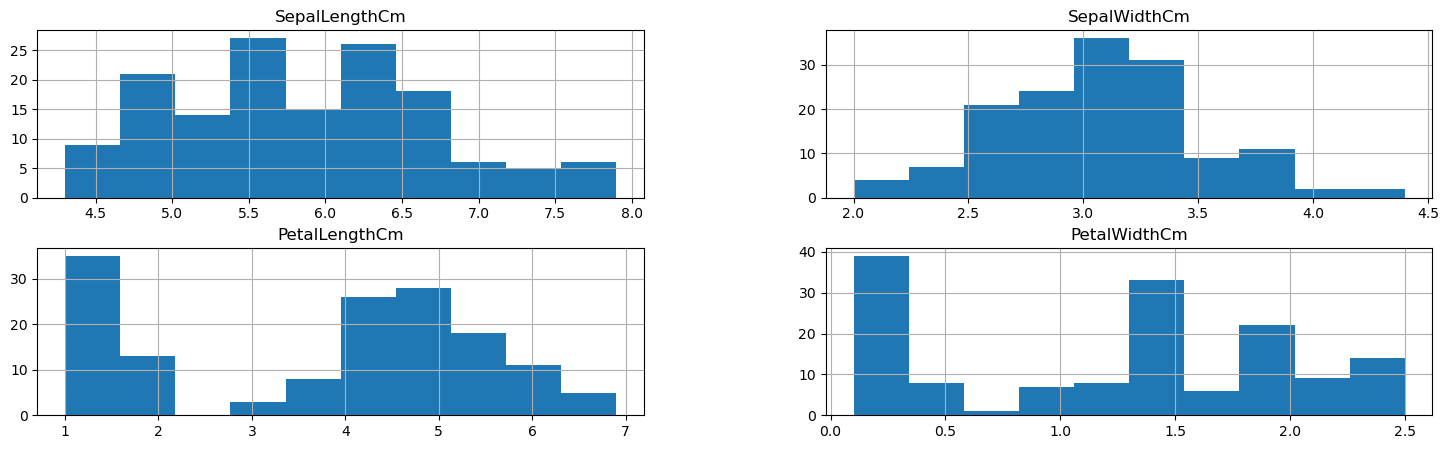

In [11]:
#Checking distributions
iris.hist(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],figsize=(18,5))

From Histogram plot, in PetalLengthCm, there is a significant gap present in the distribution which may possibly indicates the presence of outliers

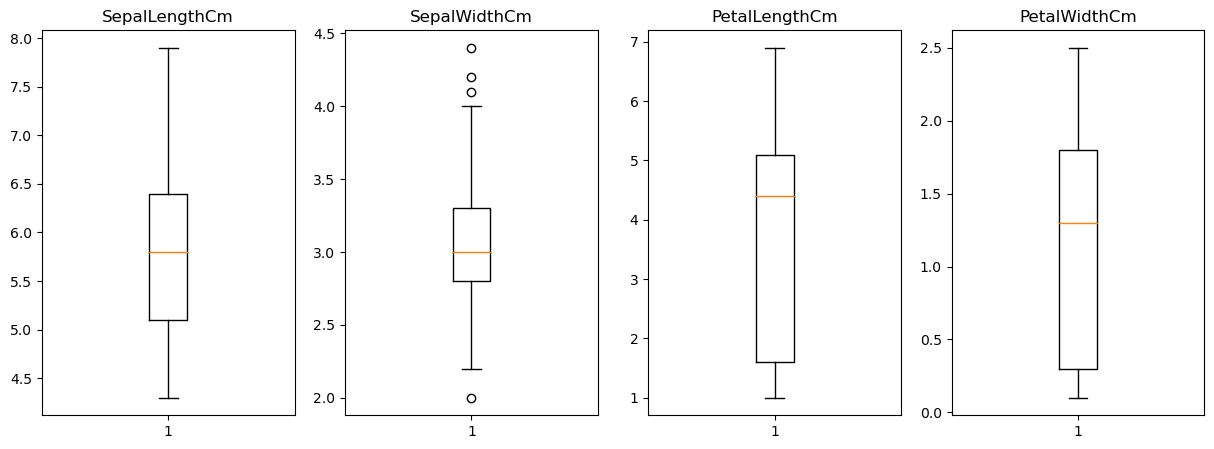

In [12]:
#Checking possibility in outliers with boxplot
ColforBox=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
fig,axs=plt.subplots(1,len(ColforBox),figsize=(15,5))
for i, column in enumerate(ColforBox):
    axs[i].boxplot(iris[column])
    axs[i].set_title(column)
plt.show()

The SeplaWidthCm has some outliers, but as the outliers are very close to their respective limmit value then these outliers can be considered for further approach

In [13]:
#Encoding target feature for fitting values in the model
from sklearn.preprocessing import LabelEncoder

In [14]:
Species=LabelEncoder()
iris['Species']=Species.fit_transform(iris['Species'])
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


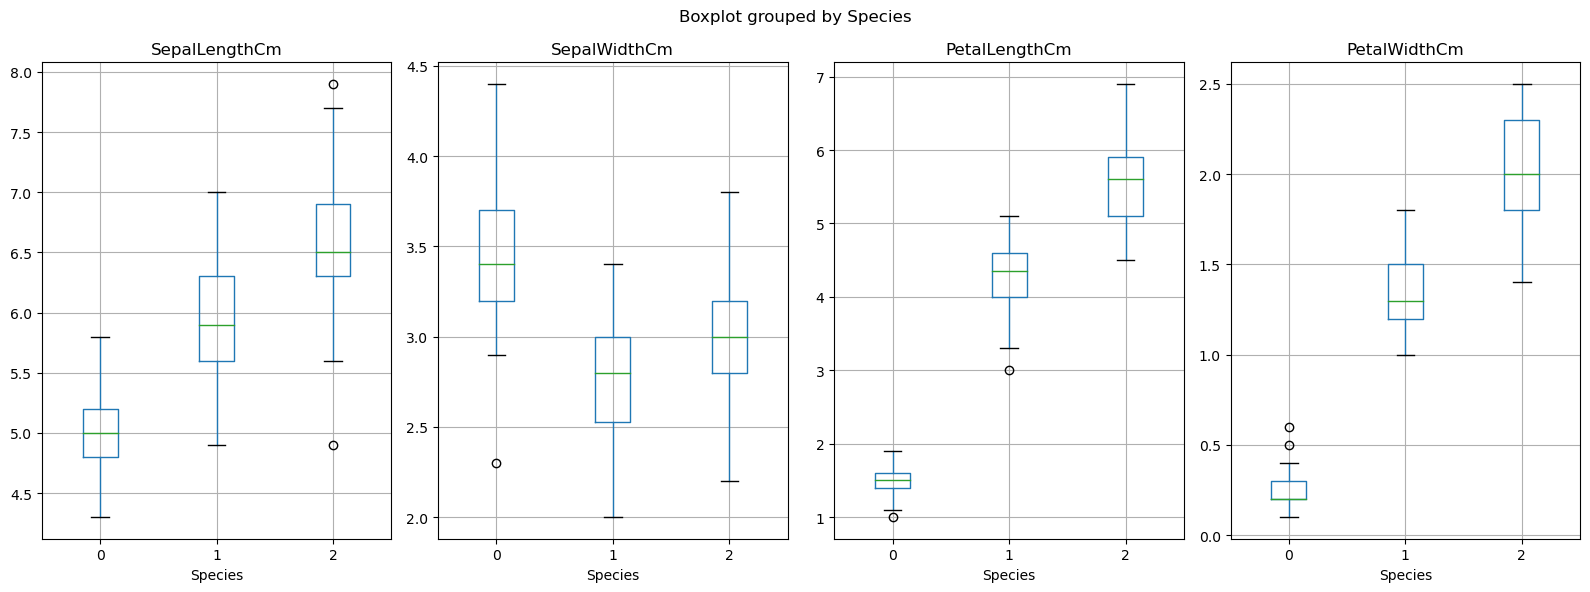

In [15]:
#Investigating relationship of these contineous feature with the target feature visually (Boxplot)
fig,axs=plt.subplots(nrows=1,ncols=len(ColforBox),figsize=(16,6))
for i, col in enumerate(ColforBox):
    iris.boxplot(column=col,by='Species',ax=axs[i])
fig.tight_layout()

The above plot indicates signifcant relationship presence of all continuous variables with the target feature

In [16]:
#Conducting statistical approch (Anova) for more assurance in relationship
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [17]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=ColforBox
FunctionAnova(inpData=iris, TargetVariable='Species', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

SepalLengthCm is correlated with Species | P-Value: 7.530911607751589e-31
SepalWidthCm is correlated with Species | P-Value: 1.150337645778676e-16
PetalLengthCm is correlated with Species | P-Value: 8.180545708674455e-89
PetalWidthCm is correlated with Species | P-Value: 1.3529729471552313e-82


['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Model Building for Prediction

In [18]:
x=iris.drop('Species',axis=1)
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
#80% training data and 20% testing data
y = iris['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [21]:
lr.predict(x_test)

array([1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0,
       2, 2, 1, 2, 2, 1, 2, 2])

In [22]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, lr.predict(x_test)))

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]


In [23]:
print(metrics.classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
print("Accuracy Score: ",lr.score(x_test,y_test))

Accuracy Score:  1.0
